In einer Studie wurde untersucht, wie bei Mäusen die Aufnahme von Eisen ($Fe^{3+}$) von der Dosis abhängt. Dazu wurden 54 Mäuse zufällig in 3 Gruppen zu je 18 Mäusen eingeteilt und jeweils mit Dosis hoch, mittel und tief gefüttert (hoch = 10.2 millimolar, mittel=1.2 millimolar, tief=0.3 millimolar). Mittels radioaktiver Markierung wurde der Anteil des zurückgehaltenen Eisens in Prozent nach einer gewissen Zeit bestimmt. Die Daten sind auf Ilias in der Datei `ironF3.dat` abgelegt; Sie können sie einlesen mit dem Befehl

In [19]:
import pandas as pd
import numpy as np

iron = pd.read_csv("ironF3.dat", sep=" ", index_col=False)
iron.head()

,high,medium,low
0,0.71,2.20,2.25
1,1.66,2.93,3.93
2,2.01,3.08,5.08
3,2.16,3.49,5.82
4,2.42,4.11,5.84


---
a) Erstellen Sie für jede der 3 Versuchsbedingungen einen Boxplot, am besten gerade nebeneinander. Wie unterscheiden sich die Daten der verschiedenen Versuchsbedingungen?

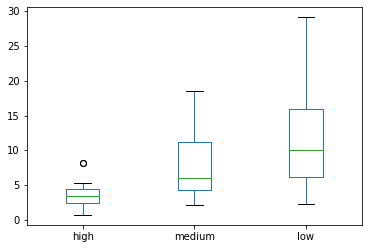

In [20]:
iron.plot(kind="box")

---
b) Transformieren Sie alle Werte mit dem Logarithmus und erstellen Sie wieder die 3 Boxplots wie bei Aufgabe a). Was hat sich durch die Transformation geändert?

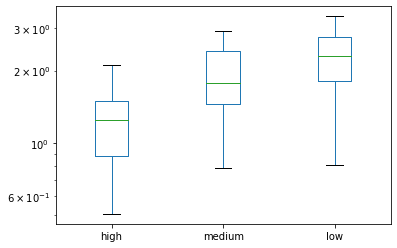

In [23]:
iron_log = iron.transform(lambda x: np.log(x))
iron_log.plot(kind="box", logy=True)

c) Erstellen Sie einen Normalplot der Daten bei mittlerer Dosis vor und nach dem Logarithmieren. Wann passt die Normalverteilung besser? Verwenden Sie die Python-Funktion: `st.probplot(...)`

((array([-1.77709673, -1.33087857, -1.05345661, -0.83977496, -0.6589352 ,
         -0.49749478, -0.34812942, -0.20618578, -0.06829777,  0.06829777,
          0.20618578,  0.34812942,  0.49749478,  0.6589352 ,  0.83977496,
          1.05345661,  1.33087857,  1.77709673]),
  array([0.71, 1.66, 2.01, 2.16, 2.42, 2.42, 2.56, 2.6 , 3.31, 3.64, 3.74,
         3.74, 4.39, 4.5 , 5.07, 5.26, 8.15, 8.24])),
 (2.0347604167572713, 3.6988888888888884, 0.9470383189707975))

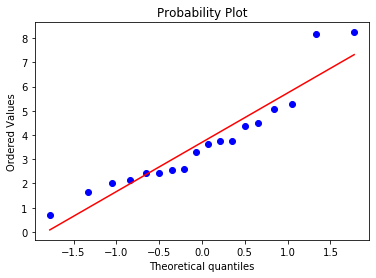

In [27]:
import scipy.stats as st
import matplotlib.pyplot as plt

st.probplot(iron['high'], plot=plt)

((array([-1.77709673, -1.33087857, -1.05345661, -0.83977496, -0.6589352 ,
         -0.49749478, -0.34812942, -0.20618578, -0.06829777,  0.06829777,
          0.20618578,  0.34812942,  0.49749478,  0.6589352 ,  0.83977496,
          1.05345661,  1.33087857,  1.77709673]),
  array([ 2.2 ,  2.93,  3.08,  3.49,  4.11,  4.95,  5.16,  5.54,  5.68,
          6.25,  7.25,  7.9 ,  8.85, 11.96, 15.54, 15.89, 18.3 , 18.59])),
 (5.375990749290599, 8.20388888888889, 0.9328392653242394))

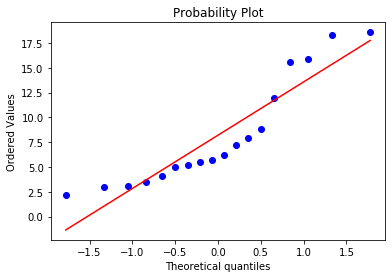

In [15]:
st.probplot(iron['medium'], plot=plt)

((array([-1.77709673, -1.33087857, -1.05345661, -0.83977496, -0.6589352 ,
         -0.49749478, -0.34812942, -0.20618578, -0.06829777,  0.06829777,
          0.20618578,  0.34812942,  0.49749478,  0.6589352 ,  0.83977496,
          1.05345661,  1.33087857,  1.77709673]),
  array([ 2.25,  3.93,  5.08,  5.82,  5.84,  6.89,  8.5 ,  8.56,  9.44,
         10.52, 13.46, 13.57, 14.76, 16.41, 16.96, 17.56, 22.82, 29.13])),
 (7.185598448015025, 11.75, 0.9664032109046843))

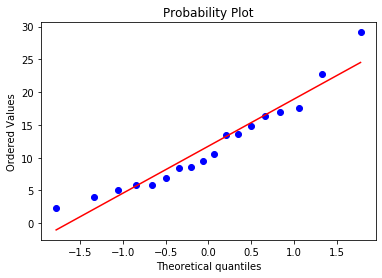

In [16]:
st.probplot(iron['low'], plot=plt)

((array([-1.77709673, -1.33087857, -1.05345661, -0.83977496, -0.6589352 ,
         -0.49749478, -0.34812942, -0.20618578, -0.06829777,  0.06829777,
          0.20618578,  0.34812942,  0.49749478,  0.6589352 ,  0.83977496,
          1.05345661,  1.33087857,  1.77709673]),
  array([0.81093022, 1.36863943, 1.62531126, 1.76130026, 1.7647308 ,
         1.93007109, 2.14006616, 2.14710019, 2.24495598, 2.35327821,
         2.59972232, 2.60786147, 2.69192082, 2.79789091, 2.83085763,
         2.86562359, 3.12763734, 3.37176857])),
 (0.6860377239534169, 2.279981458040418, 0.9880400690020558))

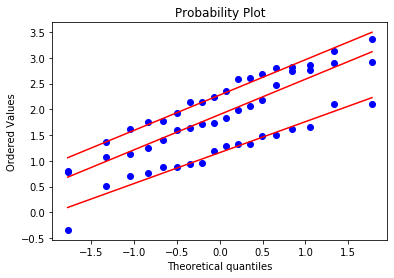

In [29]:
st.probplot(iron_log['high'], plot=plt)
st.probplot(iron_log['medium'], plot=plt)
st.probplot(iron_log['low'], plot=plt)

d) Unter der Annahme, dass die Daten bei mittlerer Dosis normalverteilt sind, schätzen Sie die Parameter $μ$ und $σ^2$. Wie gross ist die Wahrscheinlichkeit, dass eine Maus mehr als 10% Eisen zurückhält.

In [33]:
mu, sigma = iron['medium'].mean(), iron['medium'].std()
print(f"N({mu}, {sigma ** 2})")

N(8.20388888888889, 29.674013398692818)


In [46]:
1 - st.norm.cdf(x=10, loc=mu, scale=sigma)

0.37080583780045595

e) (Zusatzaufgabe) Unter der Annahme, dass die Daten bei mittlerer Dosis log-normalverteilt sind, schätzen Sie die Parameter $μ$ und $σ^2$. Wie gross ist die Wahrscheinlichkeit, dass eine Maus mehr als 10% Eisen zurückhält.

*Hinweis*: Ist $Y=log(X)$ normalverteilt ist, so heisst $X$log-normalverteilt.